# MobileNet modeli ile çalışılması

### Gerekli kütüphanelerin import edilmesi

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

2022-11-21 03:14:46.077342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 03:14:46.575736: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-21 03:14:48.154149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2022-11-21 03:14:48.154728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_

### Mobile-Net modelinin indirilmesi

In [2]:
mobile = tf.keras.applications.mobilenet.MobileNet()

2022-11-21 03:14:51.175088: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2022-11-21 03:14:51.175146: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: strawberry-ABRA-A7-V7-1
2022-11-21 03:14:51.175171: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: strawberry-ABRA-A7-V7-1
2022-11-21 03:14:51.175366: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.85.2
2022-11-21 03:14:51.175408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-11-21 03:14:51.175417: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 510.85.2 -- cannot find working devices in this configuration
2022-11-21 03:14:51.175903: I tensorflow/core/platform/cpu_feature

### Model için görselin hazırlanmasını ve modele aktarılarak sonucu döndüren fonksiyonun yazılması

In [3]:
def prepare_image(file):
    img_path = '/home/strawberry/DevCodes/jupyterpython/data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

## Örnek görseller üzerinde Mobile-Net modelinin sonuçları

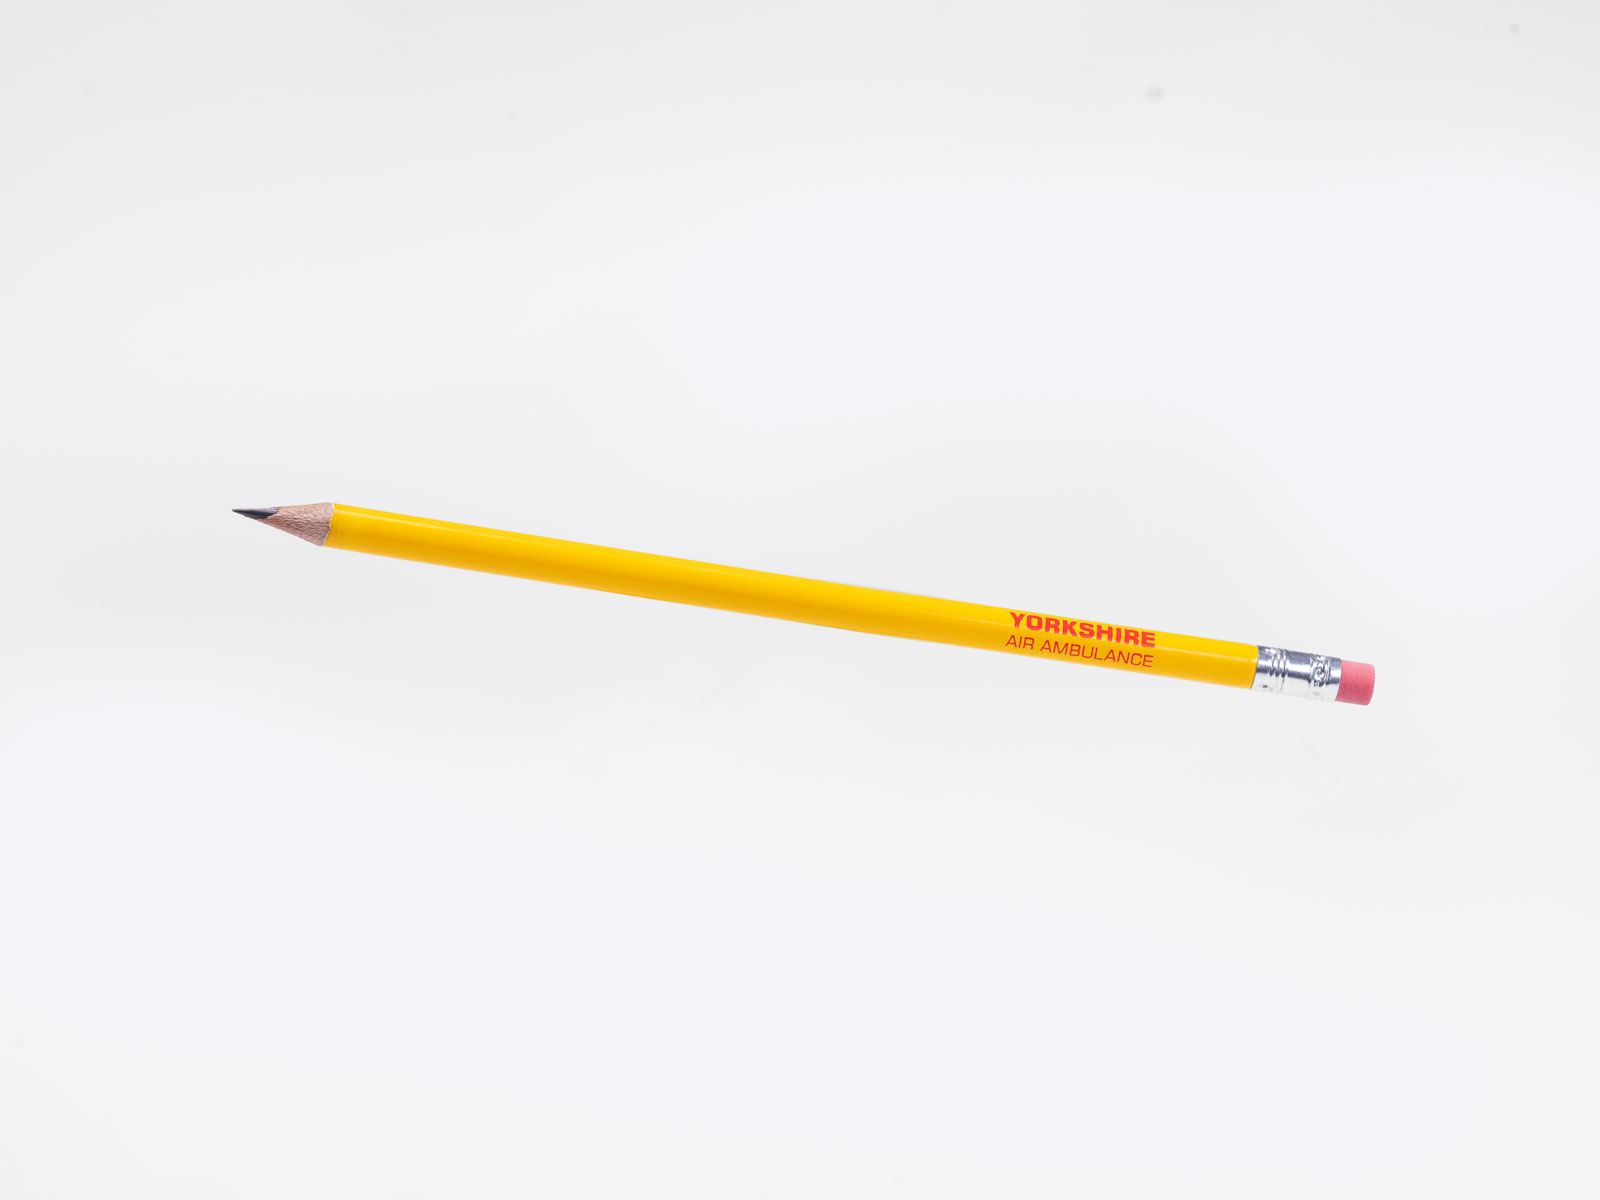

In [4]:
from IPython.display import Image
Image(filename='/home/strawberry/DevCodes/jupyterpython/data/MobileNet-samples/1.jpg',width=300,height=200)

In [5]:
preprocessed_image = prepare_image('1.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 1s 1s/step


[[('n04116512', 'rubber_eraser', 0.49236012),
  ('n03908714', 'pencil_sharpener', 0.41602594),
  ('n02783161', 'ballpoint', 0.063288845),
  ('n04376876', 'syringe', 0.003952845),
  ('n04118776', 'rule', 0.003897051)]]

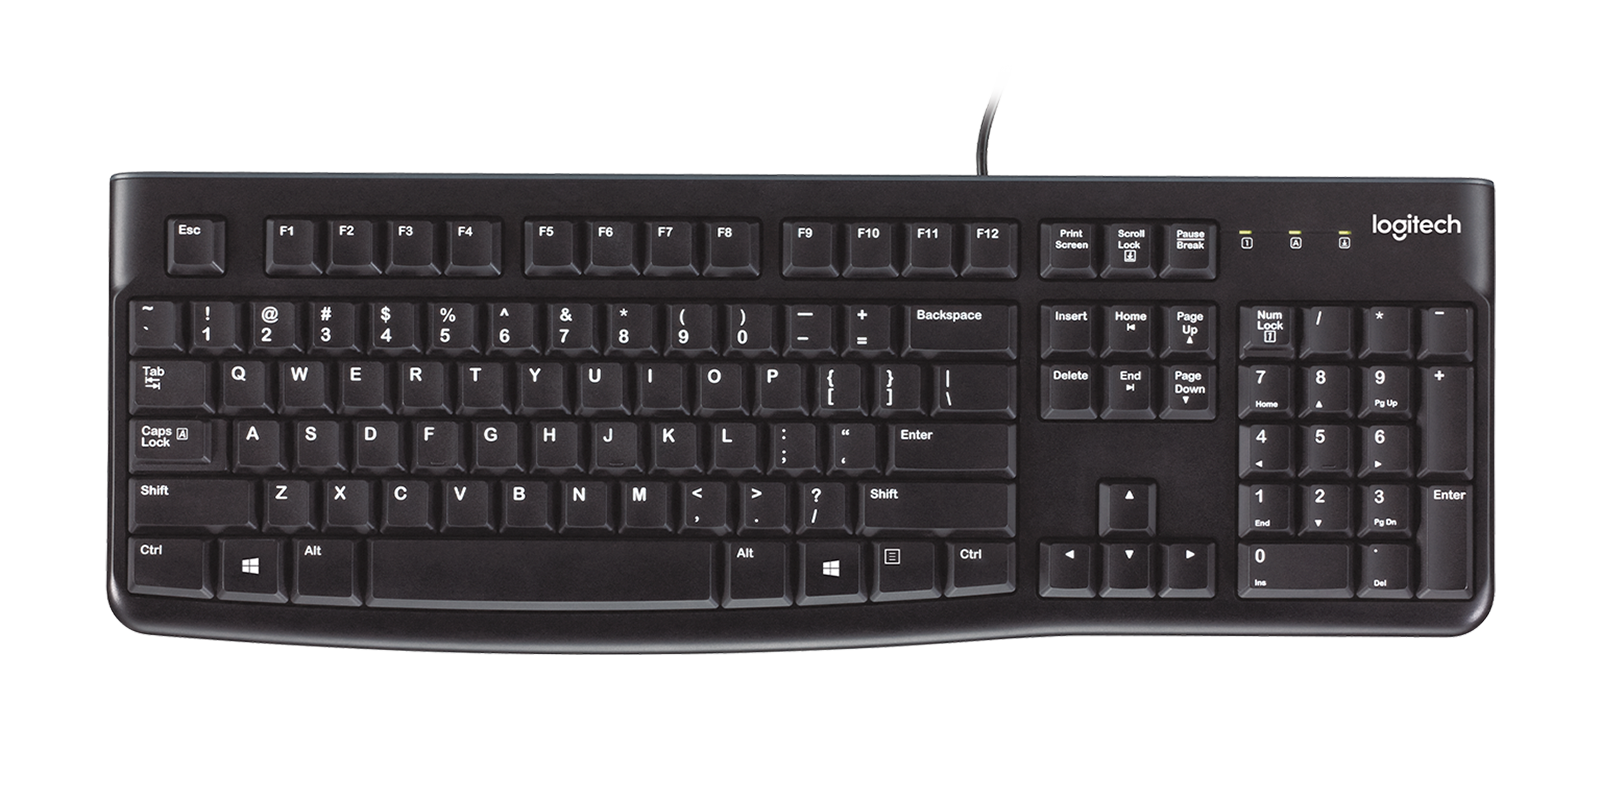

In [6]:
Image(filename='/home/strawberry/DevCodes/jupyterpython/data/MobileNet-samples/4.png',width=300,height=200)

In [7]:
preprocessed_image = prepare_image('4.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 86ms/step


[[('n04264628', 'space_bar', 0.6051807),
  ('n03085013', 'computer_keyboard', 0.23571728),
  ('n03832673', 'notebook', 0.06011074),
  ('n04505470', 'typewriter_keyboard', 0.054446474),
  ('n04149813', 'scoreboard', 0.009950935)]]

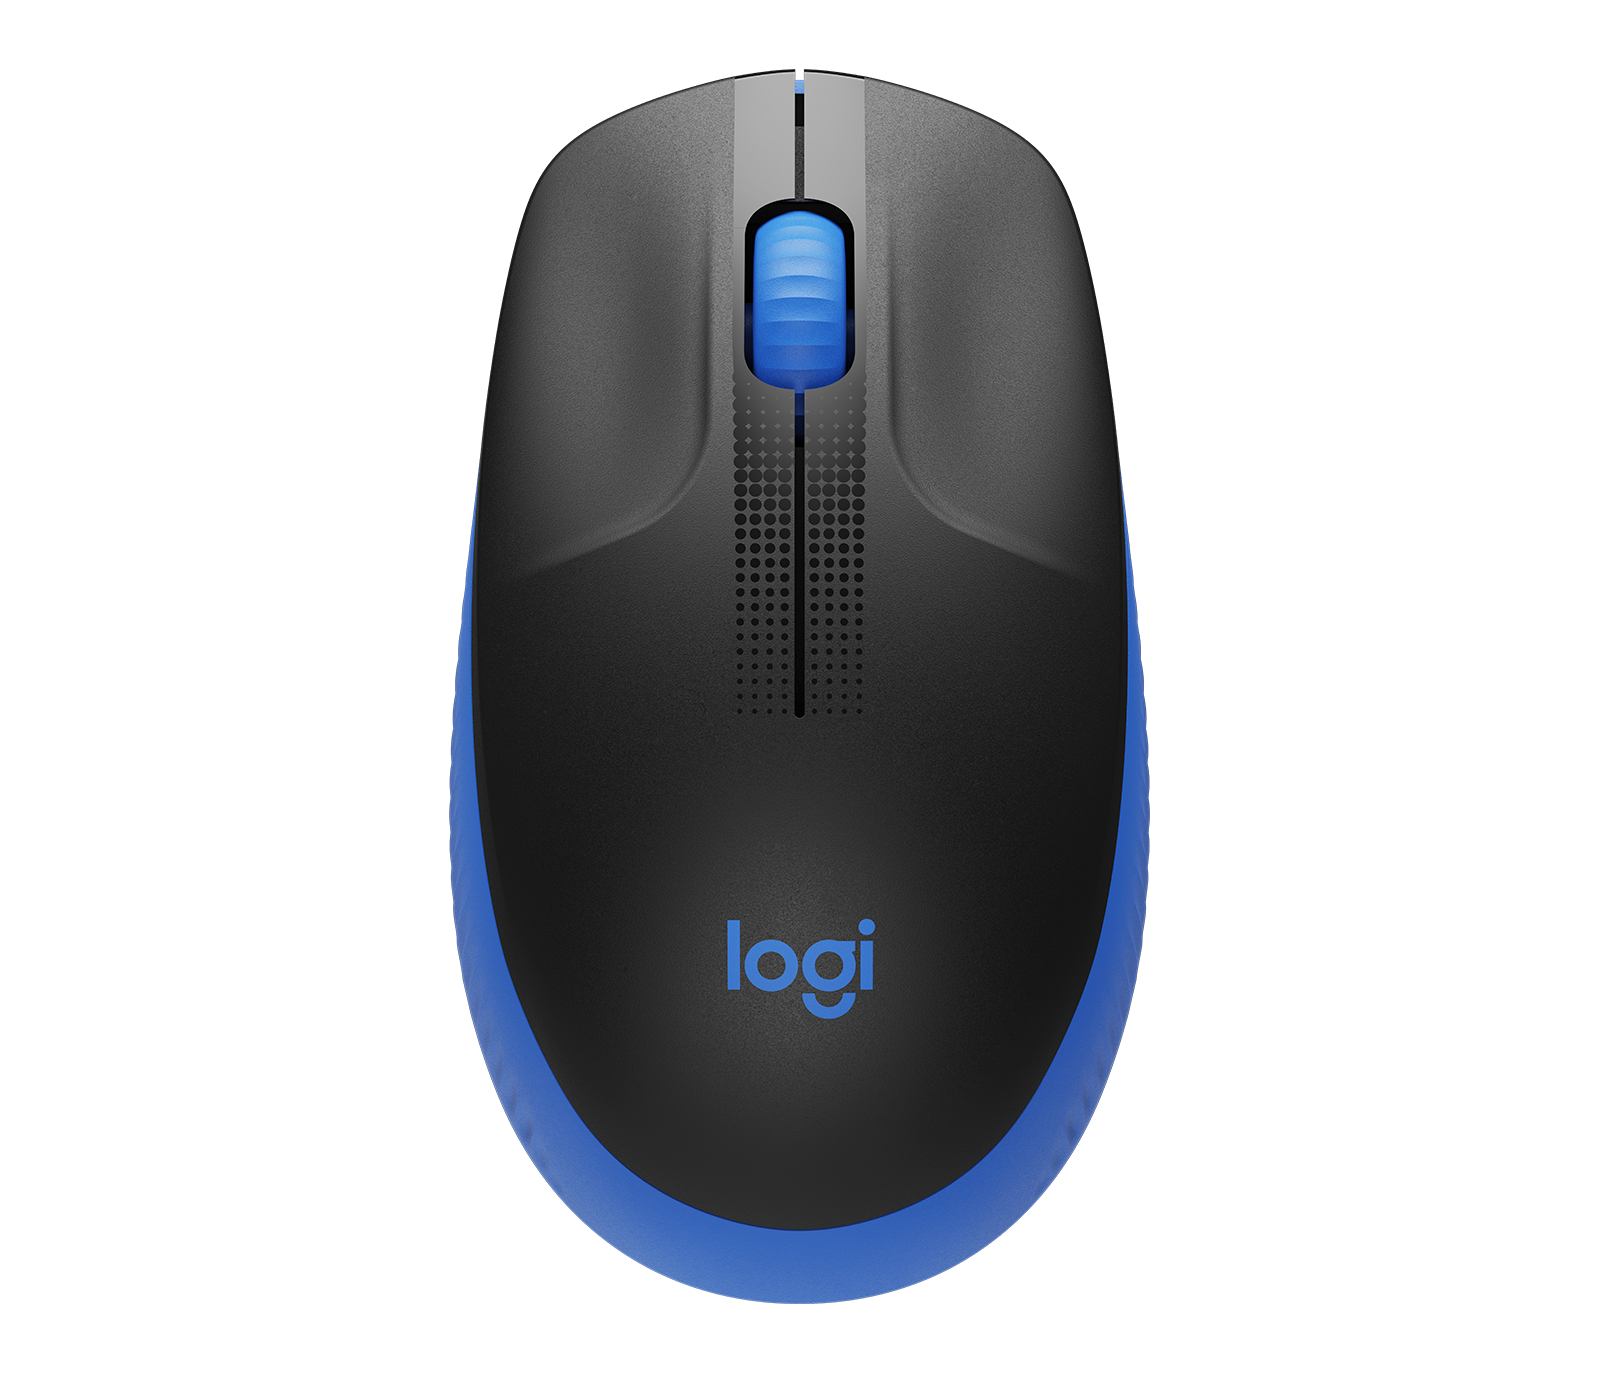

In [8]:
Image(filename='/home/strawberry/DevCodes/jupyterpython/data/MobileNet-samples/5.png',width=300,height=200)

In [9]:
preprocessed_image = prepare_image('5.png')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 79ms/step


[[('n03793489', 'mouse', 0.6556776),
  ('n03777754', 'modem', 0.20619124),
  ('n03180011', 'desktop_computer', 0.12633304),
  ('n04074963', 'remote_control', 0.0021324933),
  ('n03492542', 'hard_disc', 0.0014576233)]]

## İşaret dili ile gösterilen rakamları tahmin eden proje için Mobile-Net modelinin ayarlanması

### Görsellerin train, test ve validation data olarak klasörlere aktarılmasını sağlayan fonksiyonun yazılması

In [10]:
os.chdir('/home/strawberry/DevCodes/jupyterpython/data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0,10):
        shutil.move(f'{i}','train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'),30)
        
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}',f'valid/{i}')
        
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir('../..')            
            

### Train, test ve validation klasörlerinin tanımlanması

In [11]:
train_path = '/home/strawberry/DevCodes/jupyterpython/data/Sign-Language-Digits-Dataset/train'
valid_path = '/home/strawberry/DevCodes/jupyterpython/data/Sign-Language-Digits-Dataset/valid'
test_path = '/home/strawberry/DevCodes/jupyterpython/data/Sign-Language-Digits-Dataset/test'

### Görsellerin modele uygun hale gelecek şekilde işlem görmesi ve hazırlanması

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [13]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

### Modelin indirilmesi

In [14]:
mobile = tf.keras.applications.mobilenet.MobileNet()

### Modelin Özeti

In [15]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

### Proje için model üzerinde ayar yapılması

In [16]:
x = mobile.layers[-6].output  
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output = Dense(units=10, activation='softmax')(x) 

In [17]:
model = Model(inputs=mobile.input, outputs=output)

In [18]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

### Modelin eğitilmesi

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])

In [23]:
model.fit(x=train_batches, validation_data = valid_batches, epochs = 10, verbose = 2)

Epoch 1/10
172/172 - 92s - loss: 0.1851 - accuracy: 0.9609 - val_loss: 0.1916 - val_accuracy: 0.9433 - 92s/epoch - 532ms/step
Epoch 2/10
172/172 - 76s - loss: 0.0763 - accuracy: 0.9912 - val_loss: 0.1439 - val_accuracy: 0.9700 - 76s/epoch - 442ms/step
Epoch 3/10
172/172 - 78s - loss: 0.0438 - accuracy: 0.9971 - val_loss: 0.1268 - val_accuracy: 0.9733 - 78s/epoch - 456ms/step
Epoch 4/10
172/172 - 78s - loss: 0.0292 - accuracy: 0.9965 - val_loss: 0.1057 - val_accuracy: 0.9800 - 78s/epoch - 452ms/step
Epoch 5/10
172/172 - 76s - loss: 0.0208 - accuracy: 0.9988 - val_loss: 0.1279 - val_accuracy: 0.9633 - 76s/epoch - 442ms/step
Epoch 6/10
172/172 - 76s - loss: 0.0212 - accuracy: 0.9977 - val_loss: 0.1260 - val_accuracy: 0.9767 - 76s/epoch - 441ms/step
Epoch 7/10
172/172 - 77s - loss: 0.0134 - accuracy: 0.9994 - val_loss: 0.1047 - val_accuracy: 0.9800 - 77s/epoch - 448ms/step
Epoch 8/10
172/172 - 78s - loss: 0.0133 - accuracy: 0.9988 - val_loss: 0.0948 - val_accuracy: 0.9867 - 78s/epoch - 452

##Eğitilen model ile test verisi üzerinde tahmin yapma


In [24]:
test_labels = test_batches.classes

In [25]:
predictions = model.predict(x=test_batches, verbose=0)

### Confusion Matrix ile sonuçların grafiğe aktarılması

In [26]:
cm = confusion_matrix(y_true=test_labels,y_pred=predictions.argmax(axis=1))

In [27]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
        plt.text(j, i , cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()    
    plt.ylabel('Gerçek Sonuç')
    plt.xlabel('Tahmin Edilen Sonuç')

In [28]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


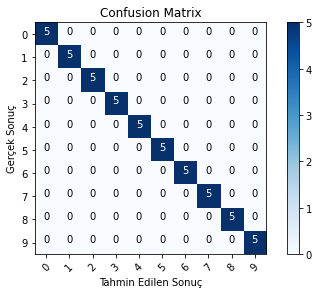

In [29]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')